
# Micro Credit Project

# Data Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

- msisdn =	mobile number of user
- aon =	age on cellular network in days
- daily_decr30 =	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 =	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 =	Average main account balance over last 30 days
- rental90 =	Average main account balance over last 90 days
- last_rech_date_ma =	Number of days till last recharge of main account
- last_rech_date_da =	Number of days till last recharge of data account
- last_rech_amt_ma =	Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 =	Number of times main account got recharged in last 30 days
- fr_ma_rech30 =	Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 =	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 =	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 =	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 =	Number of times main account got recharged in last 90 days
- fr_ma_rech90 =	Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 =	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 =	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 =	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 =	Number of times data account got recharged in last 30 days
- fr_da_rech30 =	Frequency of data account recharged in last 30 days
- cnt_da_rech90 =	Number of times data account got recharged in last 90 days
- fr_da_rech90 =	Frequency of data account recharged in last 90 days
- cnt_loans30 =	Number of loans taken by user in last 30 days
- amnt_loans30 =	Total amount of loans taken by user in last 30 days
- maxamnt_loans30 =	maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 =	Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 =	Number of loans taken by user in last 90 days
- amnt_loans90 =	Total amount of loans taken by user in last 90 days
- maxamnt_loans90 =	maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 =	Median of amounts of loan taken by the user in last 90 days
- payback30 =	Average payback time in days over last 30 days
- payback90 =	Average payback time in days over last 90 days
- pcircle =	telecom circle
- pdate =	date


Dependent Variable (Target Variable)
- label = Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}


PROBLEM STATEMENT :
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

We have to Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

So, from the problem statement and the Dataset we can understand that it is a "Classification problem". so we will be using some Classification algorithms to make our model and then use RANDOMSEARCHCV for hypeparameter tuning.

# Importing the needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import sklearn


import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
df = pd.read_csv('mcp.csv')

# Data Assessing

In [3]:
# Using this command so that it displays all the columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
#Lets see the columns of the dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

We have 36 independent variables and 1 target variable, i.e. Label in the training dataset.

In [5]:
#Loading the head of the Dataset to get a general view of the Data we will be working with.
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


So by seeing the data we get a general understanding that some Data Cleaning is needed in the Dataset.

In [7]:
#Checking The Data Dimension
df.shape

(209593, 37)

In [8]:
#Lets check for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As we can see that there are no null values present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

So from the above we can see that there are three types of values present in the dataset, i.e float64,int64 and object

In [10]:
#Lets get a general idea about the dataset by the describe method
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


So from both the tables above we can conclude that:

- There are no null values in the dataset that we have to deal with.
- There also seems to be outliers for some of the features.
- And some kind of skewness can also be seen from the description which we will see it more clearly later on.

In [11]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(df.duplicated())))

Number of duplicate values in train data is 0


In [12]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

From the above we can see that it is an imbalanced Dataset.

In [13]:
#Lets drop the 'unnamed,pdate and msisdn' as it has no significance in the Dataset
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.drop(['msisdn'],inplace = True, axis = 1)
df.drop(['pdate'],inplace = True, axis = 1)


In [14]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW


In [15]:
#Lets drop pcircle as it is the name of the telecom circle (Only one in the whole Dataset)


In [16]:
df.drop(['pcircle'],inplace = True, axis = 1)

In [17]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


From the above we can see that we have removed all the unwanted and not so needed columns in the Dataset.

In [18]:
df.fillna(0)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [19]:
df.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

# Exploratory Data Analysis (EDA)

1    183431
0     26162
Name: label, dtype: int64


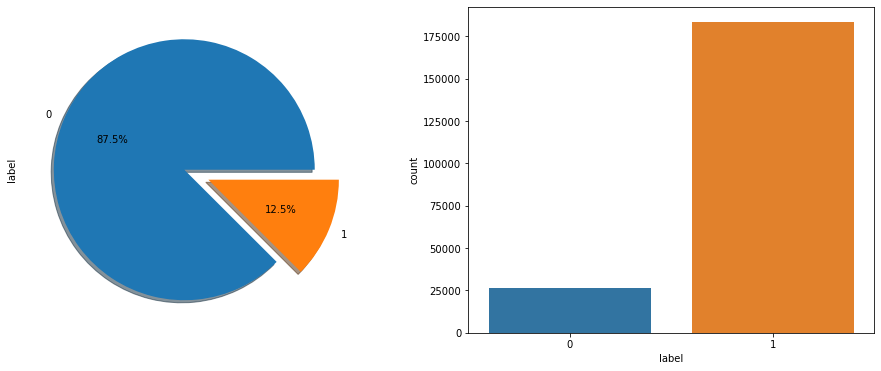

In [20]:
#Univariate Analysis

print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['0', '1']
df['label'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('label',data=df, ax=ax[1])
ax[1].set_xticklabels(['0', '1'], fontsize=10)
plt.show()

So we can see from the figure that the Dataset is so imbalanced which we will deal later.

In [21]:
## SEE the number of of outliers 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [22]:
#The following statement will print True in presence of outliers and False if not
print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

        label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0        True  False         False         False     False     False   
1       False  False         False         False     False     False   
2       False  False         False         False     False     False   
3       False  False         False         False     False     False   
4       False  False         False         False     False     False   
...       ...    ...           ...           ...       ...       ...   
209588  False  False         False         False     False     False   
209589  False  False         False         False     False     False   
209590  False  False         False         False     False     False   
209591  False  False         False         False     False     False   
209592  False  False         False         False     False     False   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                   False              False          

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

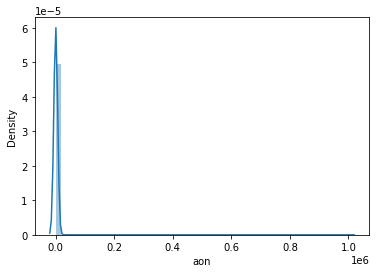

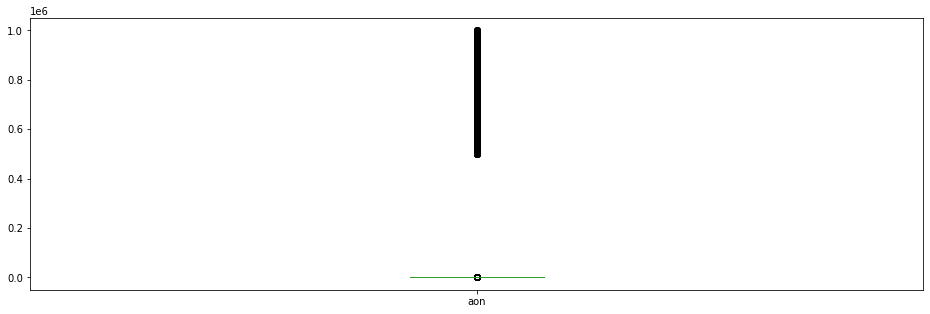

In [23]:
sns.distplot(df['aon'])
plt.show()
df['aon'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

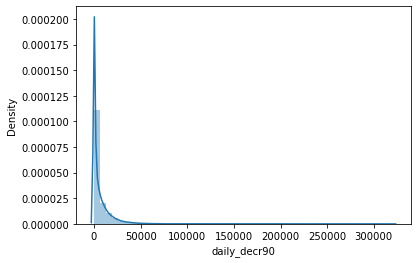

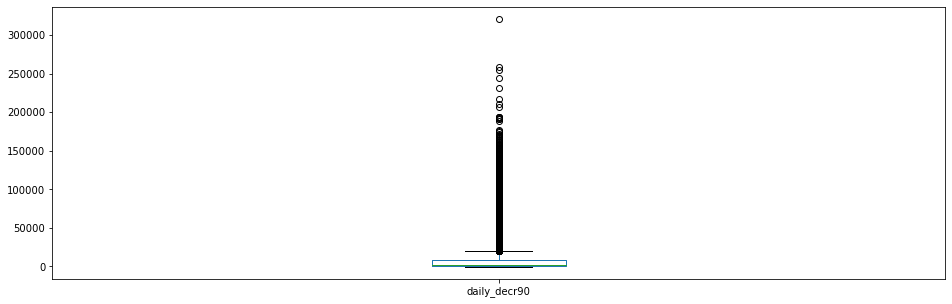

In [24]:
sns.distplot(df['daily_decr90'])
plt.show()
df['daily_decr90'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

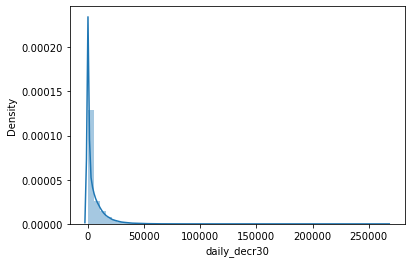

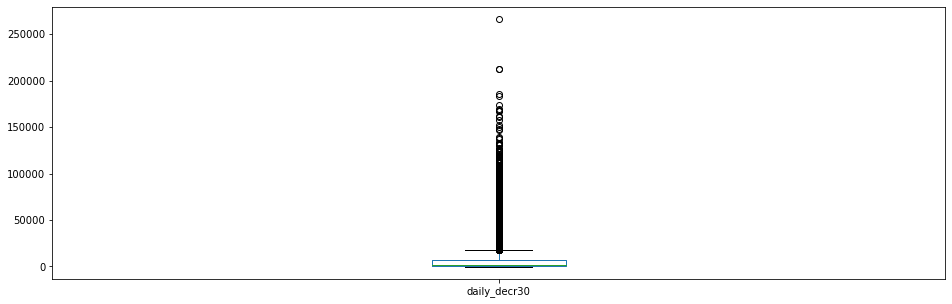

In [25]:
sns.distplot(df['daily_decr30'])
plt.show()
df['daily_decr30'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

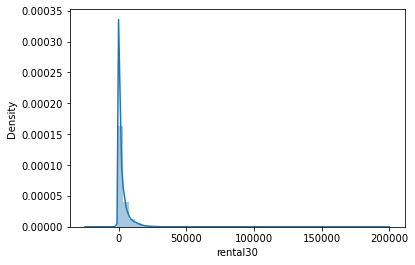

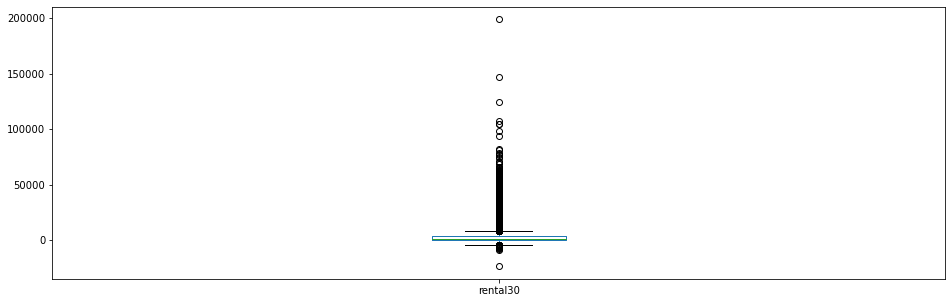

In [26]:
sns.distplot(df['rental30'])
plt.show()
df['rental30'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

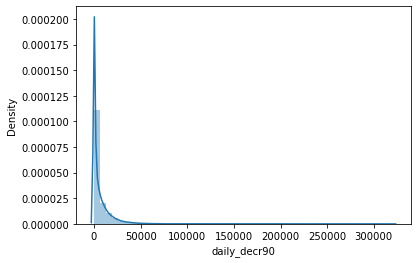

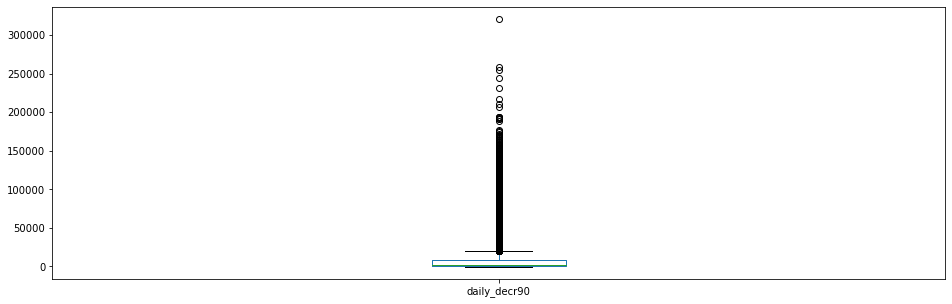

In [27]:
sns.distplot(df['daily_decr90'])
plt.show()
df['daily_decr90'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

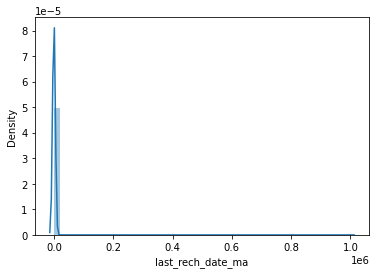

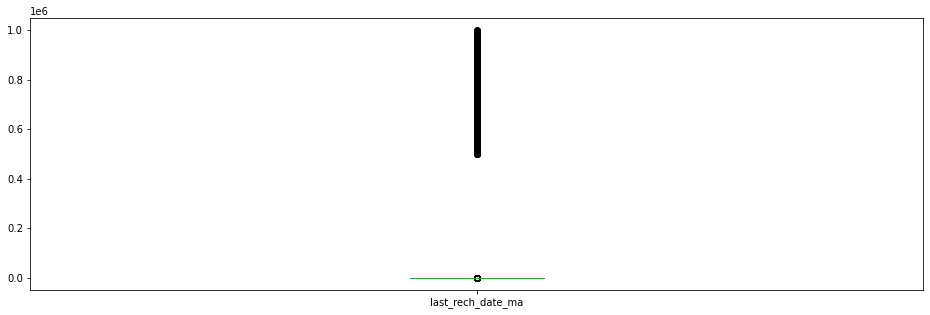

In [28]:
sns.distplot(df['last_rech_date_ma'])
plt.show()
df['last_rech_date_ma'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

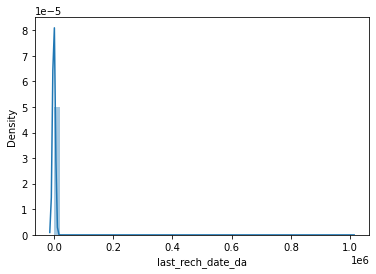

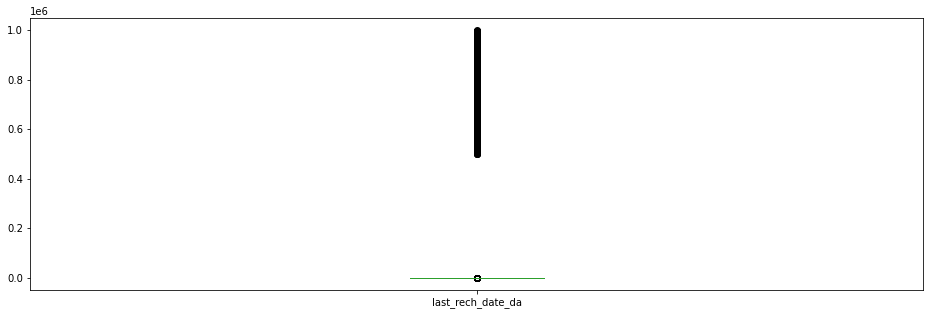

In [29]:
sns.distplot(df['last_rech_date_da'])
plt.show()
df['last_rech_date_da'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

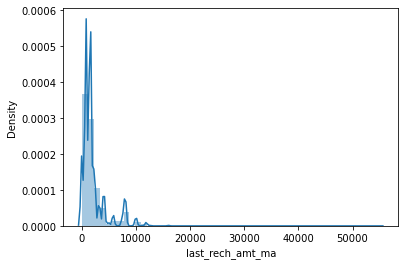

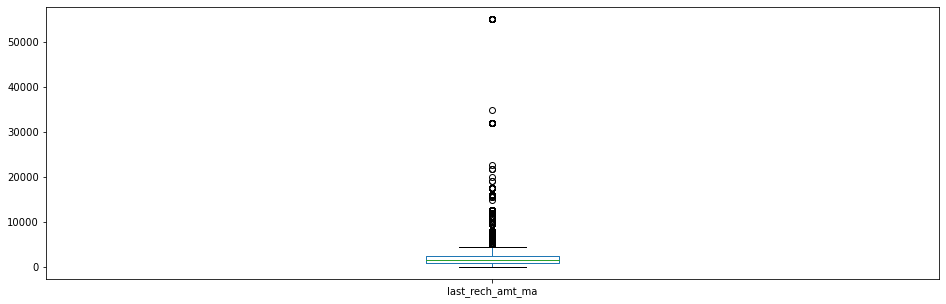

In [30]:
sns.distplot(df['last_rech_amt_ma'])
plt.show()
df['last_rech_amt_ma'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

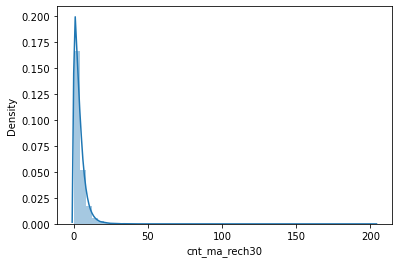

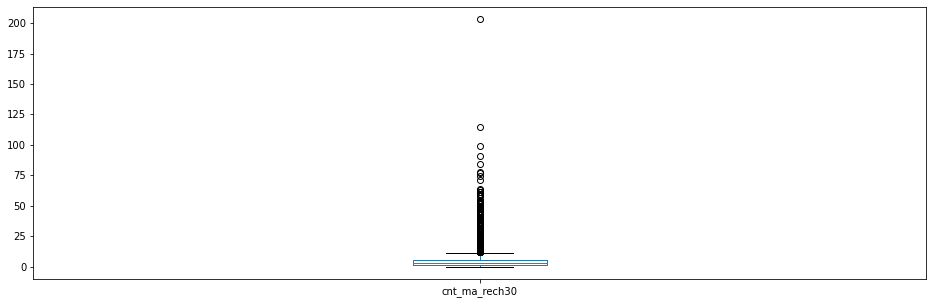

In [31]:
sns.distplot(df['cnt_ma_rech30'])
plt.show()
df['cnt_ma_rech30'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

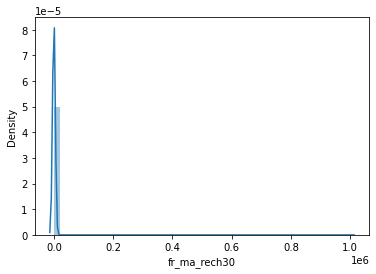

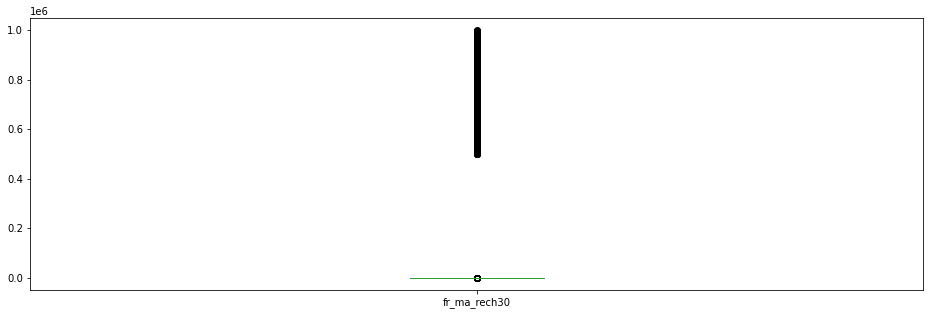

In [32]:
sns.distplot(df['fr_ma_rech30'])
plt.show()
df['fr_ma_rech30'].plot.box(figsize=(16,5))
plt.show()

We can see presence of outliers in aon column in the dataset.

In [33]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


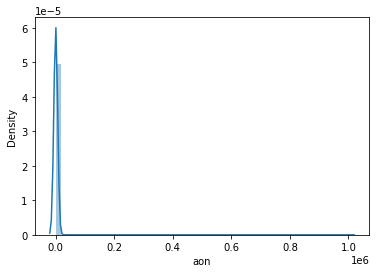

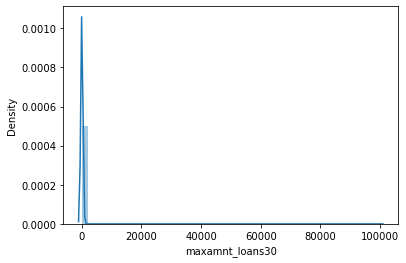

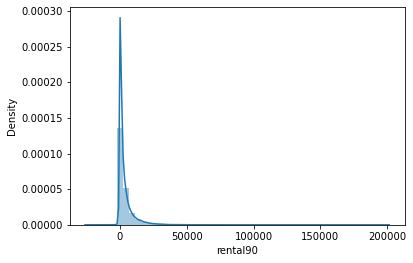

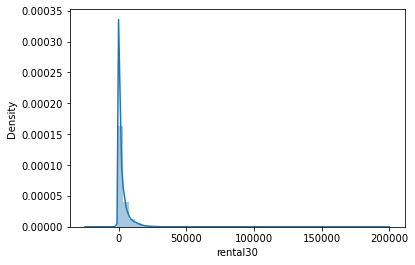

In [34]:
#Lets see skewness for some of the columns
columns=['aon','maxamnt_loans30','rental90','rental30']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

From the above we can see most of the features are right skewed, which we will handle later.

In [35]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

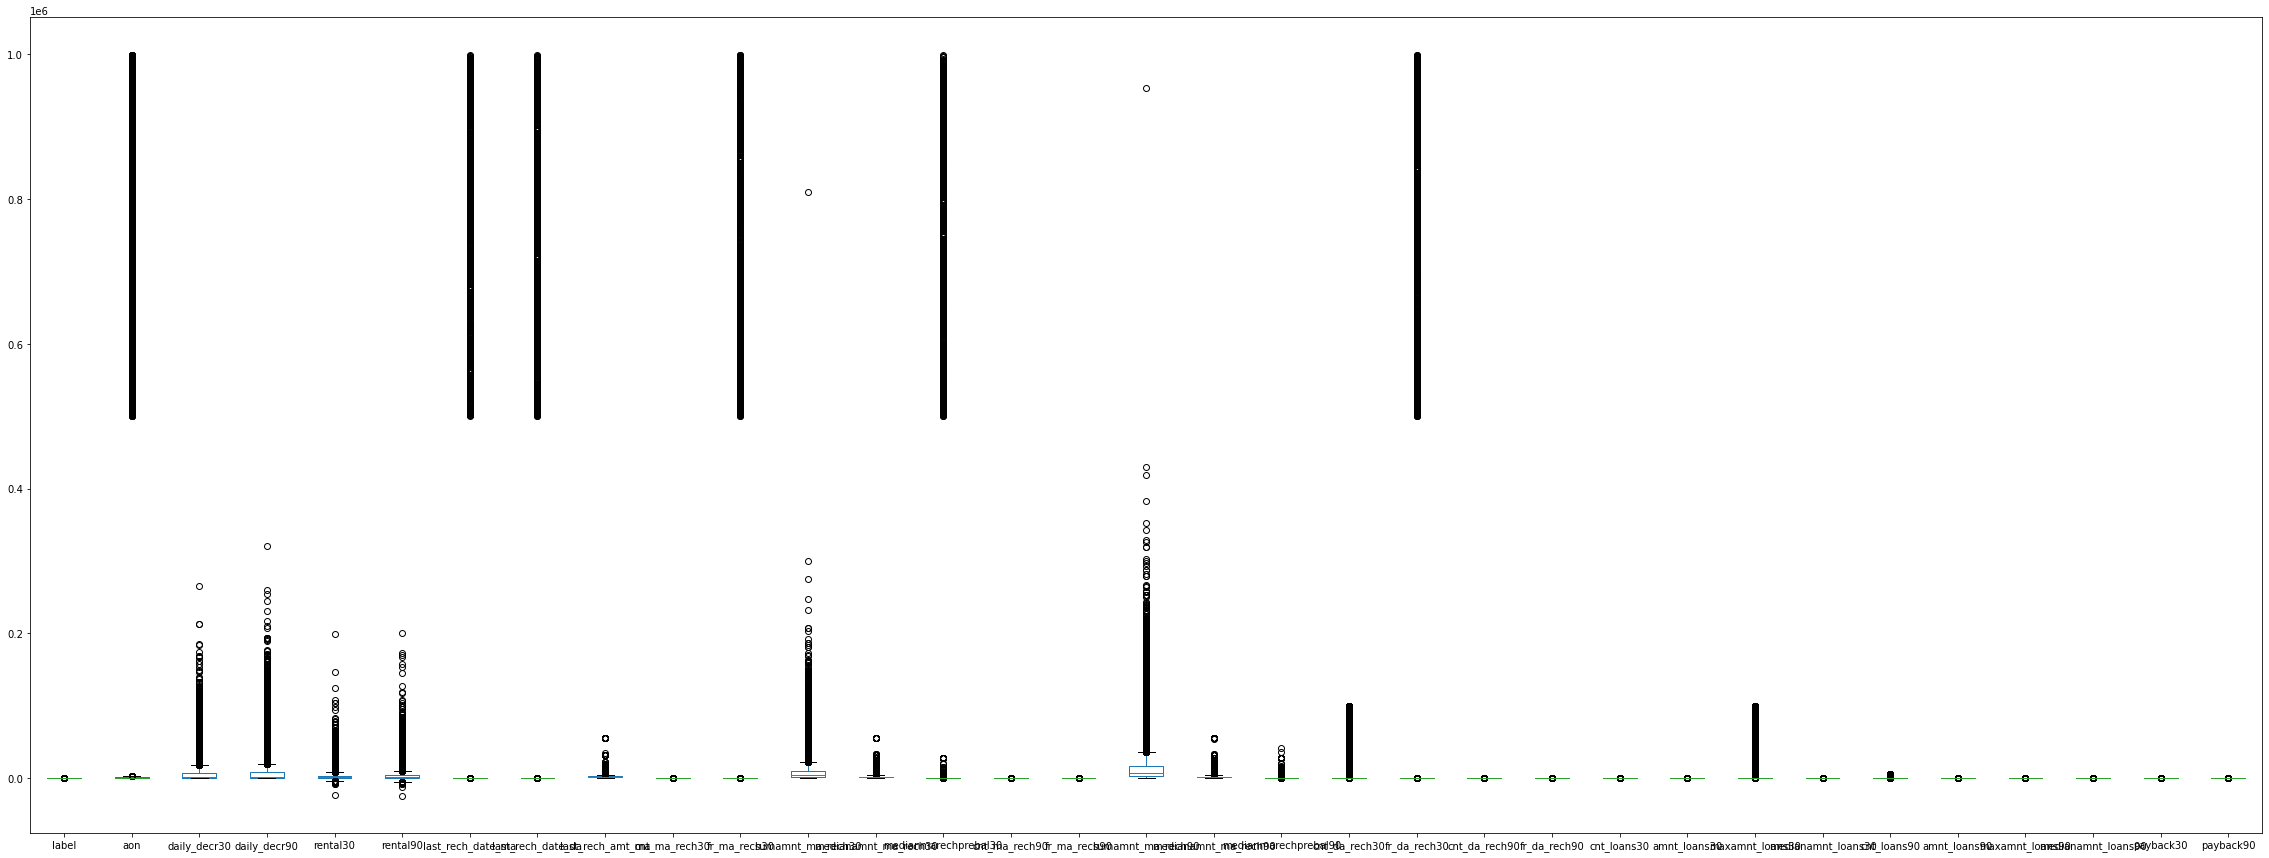

In [36]:
df.plot.box(figsize=(40,15))
plt.show()

So from the above we can conclude that there are presence of Outliers in most of the features in the Dataset, which we will handle later one by one.

# Data Cleaning


Lets remove all the negative signs from all the columns and then we will remove outliers and skewness.

In [37]:
#Removing '-' sign from the aon column
df["aon"]= df["aon"].astype(str)
df["aon"]= df["aon"].str.replace("-", "")
df["aon"]= df["aon"].astype(float)


In [38]:
#Removing '-' sign from the daily_decr30 column
df["daily_decr30"]= df["daily_decr30"].astype(str)
df["daily_decr30"]= df["daily_decr30"].str.replace("-", "")
df["daily_decr30"]= df["daily_decr30"].astype(float)

In [39]:
#Removing '-' sign from the daily_decr90 column
df["daily_decr90"]= df["daily_decr90"].astype(str)
df["daily_decr90"]= df["daily_decr90"].str.replace("-", "")
df["daily_decr90"]= df["daily_decr90"].astype(float)

In [40]:
#Removing '-' sign from the rental30 column
df["rental30"]= df["rental30"].astype(str)
df["rental30"]= df["rental30"].str.replace("-", "")
df["rental30"]= df["rental30"].astype(float)

In [41]:
#Removing '-' sign from the rental90 column
df["rental90"]= df["rental90"].astype(str)
df["rental90"]= df["rental90"].str.replace("-", "")
df["rental90"]= df["rental90"].astype(float)

In [42]:
#Removing '-' sign from the last_rech_date_ma column
df["last_rech_date_ma"]= df["last_rech_date_ma"].astype(str)
df["last_rech_date_ma"]= df["last_rech_date_ma"].str.replace("-", "")
df["last_rech_date_ma"]= df["last_rech_date_ma"].astype(float)

In [43]:
#Removing '-' sign from the last_rech_date_da column
df["last_rech_date_da"]= df["last_rech_date_da"].astype(str)
df["last_rech_date_da"]= df["last_rech_date_da"].str.replace("-", "")
df["last_rech_date_da"]= df["last_rech_date_da"].astype(float)

In [44]:
#Removing '-' sign from the medianamnt_ma_rech30 column
df["medianamnt_ma_rech30"]= df["medianamnt_ma_rech30"].astype(str)
df["medianamnt_ma_rech30"]= df["medianamnt_ma_rech30"].str.replace("-", "")
df["medianamnt_ma_rech30"]= df["medianamnt_ma_rech30"].astype(float)

In [45]:
#Removing '-' sign from the medianmarechprebal30 column
df["medianmarechprebal30"]= df["medianmarechprebal30"].astype(str)
df["medianmarechprebal30"]= df["medianmarechprebal30"].str.replace("-", "")
df["medianmarechprebal30"]= df["medianmarechprebal30"].astype(float)

In [46]:
#Removing '-' sign from the medianmarechprebal90 column
df["medianmarechprebal90"]= df["medianmarechprebal90"].astype(str)
df["medianmarechprebal90"]= df["medianmarechprebal90"].str.replace("-", "")
df["medianmarechprebal90"]= df["medianmarechprebal90"].astype(float)

Lets see if all the negative sign is removed from the dataset

In [47]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


From the above we can see that all the '-' sign are removed from the columns

In [48]:
df.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

OUTLIER TREATMENT FOR THE VARIABLES

In [49]:
#Treating outlier for the column aon using median method

print(df['aon'].quantile(0.50))
print(df['aon'].quantile(0.95))


527.0
1749.0


In [50]:
df['aon'] = np.where(df['aon'] > 1749,527, df['aon'])

In [51]:
#Treating outlier for the column last_rech_date_ma using median method

print(df['last_rech_date_ma'].quantile(0.50))
print(df['last_rech_date_ma'].quantile(0.95))

3.0
26.0


In [52]:
df['last_rech_date_ma'] = np.where(df['last_rech_date_ma'] > 26,3, df['last_rech_date_ma'])

In [53]:
#Treating outlier for the column last_rech_date_da using median method

print(df['last_rech_date_da'].quantile(0.50))
print(df['last_rech_date_da'].quantile(0.95))

0.0
0.0


In [54]:
df['last_rech_date_da'] = np.where(df['last_rech_date_da'] > 0,0, df['last_rech_date_da'])

In [55]:
#Treating outlier for the column fr_ma_rech30 using median method

print(df['fr_ma_rech30'].quantile(0.50))
print(df['fr_ma_rech30'].quantile(0.95))

2.0
16.0


In [56]:
df['fr_ma_rech30'] = np.where(df['fr_ma_rech30'] > 2,16, df['fr_ma_rech30'])

In [57]:
#Treating outlier for the column medianmarechprebal30 using median method

print(df['medianmarechprebal30'].quantile(0.50))
print(df['medianmarechprebal30'].quantile(0.95))

35.0
402.4


In [58]:
df['medianmarechprebal30'] = np.where(df['medianmarechprebal30'] > 402,35, df['medianmarechprebal30'])

In [59]:
#Treating outlier for the column medianmarechprebal90 using median method

print(df['medianmarechprebal90'].quantile(0.50))
print(df['medianmarechprebal90'].quantile(0.95))

37.0
345.7739999999999


In [60]:
df['medianmarechprebal90'] = np.where(df['medianmarechprebal90'] > 345,37, df['medianmarechprebal90'])

In [61]:
#Treating outlier for the column cnt_da_rech30 using median method

print(df['cnt_da_rech30'].quantile(0.50))
print(df['cnt_da_rech30'].quantile(0.95))

0.0
0.0


In [62]:
df['cnt_da_rech30'] = np.where(df['cnt_da_rech30'] > 0,0, df['cnt_da_rech30'])

In [63]:
#Treating outlier for the column fr_da_rech30 using median method

print(df['fr_da_rech30'].quantile(0.50))
print(df['fr_da_rech30'].quantile(0.95))

0.0
0.0


In [64]:
df['fr_da_rech30'] = np.where(df['fr_da_rech30'] > 0,0, df['fr_da_rech30'])

In [65]:
#Treating outlier for the column cnt_da_rech90 using median method

print(df['cnt_da_rech90'].quantile(0.50))
print(df['cnt_da_rech90'].quantile(0.95))

0.0
0.0


In [66]:
df['cnt_da_rech90'] = np.where(df['cnt_da_rech90'] > 0,0, df['cnt_da_rech90'])

In [67]:
#Treating outlier for the column fr_da_rech90 using median method

print(df['fr_da_rech90'].quantile(0.50))
print(df['fr_da_rech90'].quantile(0.95))

0.0
0.0


In [68]:
df['fr_da_rech90'] = np.where(df['fr_da_rech90'] > 0,0, df['fr_da_rech90'])

In [69]:
#Treating outlier for the column maxamnt_loans30 using median method

print(df['maxamnt_loans30'].quantile(0.50))
print(df['maxamnt_loans30'].quantile(0.95))

6.0
12.0


In [70]:
df['maxamnt_loans30'] = np.where(df['maxamnt_loans30'] > 12,6, df['maxamnt_loans30'])

In [71]:
#Treating outlier for the column cnt_loans90 using median method

print(df['cnt_loans90'].quantile(0.50))
print(df['cnt_loans90'].quantile(0.95))

2.0
12.0


In [72]:
df['cnt_loans90'] = np.where(df['cnt_loans90'] > 12,2, df['cnt_loans90'])

In [73]:
#Treating outlier for the column payback30 using median method

print(df['payback30'].quantile(0.50))
print(df['payback30'].quantile(0.95))

0.0
13.0


In [74]:
df['payback30'] = np.where(df['payback30'] > 13,0, df['payback30'])

In [75]:
#Treating outlier for the column payback90 using median method

print(df['payback90'].quantile(0.50))
print(df['payback90'].quantile(0.95))

1.6666666666666698
17.0


In [76]:
df['payback90'] = np.where(df['payback90'] > 17,1, df['payback90'])

In [77]:
#Treating outlier for the column sumamnt_ma_rech30 using median method

print(df['sumamnt_ma_rech30'].quantile(0.50))
print(df['sumamnt_ma_rech30'].quantile(0.95))

4628.0
24837.0


In [78]:
df['sumamnt_ma_rech30'] = np.where(df['sumamnt_ma_rech30'] > 24837,4628, df['sumamnt_ma_rech30'])

In [79]:
#Treating outlier for the column daily_decr30 using median method

print(df['daily_decr30'].quantile(0.50))
print(df['daily_decr30'].quantile(0.95))

1469.17566666667
22577.499999999985


In [80]:
df['daily_decr30'] = np.where(df['daily_decr30'] > 22577,1469, df['daily_decr30'])

In [81]:
#Treating outlier for the column daily_decr90 using median method

print(df['daily_decr90'].quantile(0.50))
print(df['daily_decr90'].quantile(0.95))

1500.0
26244.257999999994


In [82]:
df['daily_decr90'] = np.where(df['daily_decr90'] > 26244,1500, df['daily_decr90'])

In [83]:
#Treating outlier for the column rental30 using median method

print(df['rental30'].quantile(0.50))
print(df['rental30'].quantile(0.95))

1095.75
11167.027999999995


In [84]:
df['rental30'] = np.where(df['rental30'] > 11167,1095, df['rental30'])

In [85]:
#Treating outlier for the column rental90 using median method

print(df['rental90'].quantile(0.50))
print(df['rental90'].quantile(0.95))

1347.22
14644.515999999989


In [86]:
df['rental90'] = np.where(df['rental90'] > 14644,1347, df['rental90'])

In [87]:
#Treating outlier for the column last_rech_amt_ma  using median method

print(df['last_rech_amt_ma'].quantile(0.50))
print(df['last_rech_amt_ma'].quantile(0.95))

1539.0
8000.0


In [88]:
df['last_rech_amt_ma'] = np.where(df['last_rech_amt_ma'] > 8000,1539, df['last_rech_amt_ma'])

In [89]:
#Treating outlier for the column cnt_ma_rech30  using median method

print(df['cnt_ma_rech30'].quantile(0.50))
print(df['cnt_ma_rech30'].quantile(0.95))

3.0
12.0


In [90]:
df['cnt_ma_rech30'] = np.where(df['cnt_ma_rech30'] > 12,3, df['cnt_ma_rech30'])

In [91]:
#Treating outlier for the column cnt_ma_rech30  using median method

print(df['cnt_ma_rech30'].quantile(0.50))
print(df['cnt_ma_rech30'].quantile(0.95))

3.0
9.0


In [92]:
df['last_rech_amt_ma'] = np.where(df['last_rech_amt_ma'] > 0,0, df['last_rech_amt_ma'])

In [93]:
#Treating outlier for the column cnt_ma_rech30  using median method

print(df['cnt_ma_rech30'].quantile(0.50))
print(df['cnt_ma_rech30'].quantile(0.95))

3.0
9.0


In [94]:
df['last_rech_amt_ma'] = np.where(df['last_rech_amt_ma'] > 0,0, df['last_rech_amt_ma'])

In [95]:
#Treating outlier for the column cnt_ma_rech30  using median method

print(df['cnt_ma_rech30'].quantile(0.50))
print(df['cnt_ma_rech30'].quantile(0.95))

3.0
9.0


In [96]:
df['cnt_ma_rech30'] = np.where(df['cnt_ma_rech30'] > 12,3, df['cnt_ma_rech30'])

In [97]:
#Treating outlier for the column medianamnt_ma_rech30  using median method

print(df['medianamnt_ma_rech30'].quantile(0.50))
print(df['medianamnt_ma_rech30'].quantile(0.95))

1539.0
7526.0


In [98]:
df['medianamnt_ma_rech30'] = np.where(df['medianamnt_ma_rech30'] > 7526,1539, df['medianamnt_ma_rech30'])

In [99]:
#Treating outlier for the column cnt_ma_rech90  using median method

print(df['cnt_ma_rech90'].quantile(0.50))
print(df['cnt_ma_rech90'].quantile(0.95))

4.0
20.0


In [100]:
df['cnt_ma_rech90'] = np.where(df['cnt_ma_rech90'] > 20,4, df['cnt_ma_rech90'])

In [101]:
#Treating outlier for the column fr_ma_rech30  using median method

print(df['fr_ma_rech90'].quantile(0.50))
print(df['fr_ma_rech90'].quantile(0.95))

2.0
37.0


In [102]:
df['fr_ma_rech90'] = np.where(df['fr_ma_rech90'] > 2,37, df['fr_ma_rech90'])

In [103]:
#Treating outlier for the column sumamnt_ma_rech90  using median method

print(df['sumamnt_ma_rech90'].quantile(0.50))
print(df['sumamnt_ma_rech90'].quantile(0.95))

7226.0
41780.99999999997


In [104]:
df['sumamnt_ma_rech90'] = np.where(df['sumamnt_ma_rech90'] > 41780,7226, df['sumamnt_ma_rech90'])

In [105]:
#Treating outlier for the column medianamnt_ma_rech90   using median method

print(df['medianamnt_ma_rech90'].quantile(0.50))
print(df['medianamnt_ma_rech90'].quantile(0.95))

1539.0
7526.0


In [106]:
df['medianamnt_ma_rech90'] = np.where(df['medianamnt_ma_rech90'] > 7526,1539, df['medianamnt_ma_rech90'])

In [107]:
#Treating outlier for the column cnt_loans30 using median method

print(df['cnt_loans30'].quantile(0.50))
print(df['cnt_loans30'].quantile(0.95))

2.0
8.0


In [108]:
df['cnt_loans30'] = np.where(df['cnt_loans30'] > 8,2, df['cnt_loans30'])

In [109]:
#Treating outlier for the column amnt_loans30  using median method

print(df['amnt_loans30'].quantile(0.50))
print(df['amnt_loans30'].quantile(0.95))

12.0
48.0


In [110]:
df['amnt_loans30'] = np.where(df['amnt_loans30'] > 48,12, df['amnt_loans30'])

In [111]:
#Treating outlier for the column medianamnt_loans30   using median method

print(df['medianamnt_loans30'].quantile(0.50))
print(df['medianamnt_loans30'].quantile(0.95))

0.0
0.5


In [112]:
df['medianamnt_loans30'] = np.where(df['medianamnt_loans30'] > 0,0, df['medianamnt_loans30'])

In [113]:
#Treating outlier for the column amnt_loans90  using median method

print(df['amnt_loans90'].quantile(0.50))
print(df['amnt_loans90'].quantile(0.95))

12.0
72.0


In [114]:
df['amnt_loans90'] = np.where(df['amnt_loans90'] > 72,12, df['amnt_loans90'])

In [115]:
#Treating outlier for the column maxamnt_loans90 using median method

print(df['maxamnt_loans90'].quantile(0.50))
print(df['maxamnt_loans90'].quantile(0.95))

6.0
12.0


In [116]:
df['maxamnt_loans90'] = np.where(df['maxamnt_loans90'] > 12,6, df['maxamnt_loans90'])

In [117]:
#Treating outlier for the column medianamnt_loans90 using median method

print(df['medianamnt_loans90'].quantile(0.50))
print(df['medianamnt_loans90'].quantile(0.95))

0.0
0.5


In [118]:
df['medianamnt_loans90'] = np.where(df['medianamnt_loans90'] > 0,0, df['medianamnt_loans90'])

In [119]:
df.skew()

label                  -2.270254
aon                     0.768740
daily_decr30            1.624003
daily_decr90            1.726828
rental30                1.757719
rental90                1.813352
last_rech_date_ma       1.909110
last_rech_date_da       0.000000
last_rech_amt_ma        0.000000
cnt_ma_rech30           1.006582
fr_ma_rech30            0.275406
sumamnt_ma_rech30       1.200590
medianamnt_ma_rech30    1.990963
medianmarechprebal30    2.221051
cnt_ma_rech90           1.163760
fr_ma_rech90            0.085365
sumamnt_ma_rech90       1.321666
medianamnt_ma_rech90    2.088036
medianmarechprebal90    2.092774
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.308396
amnt_loans30            1.259116
maxamnt_loans30         1.435587
medianamnt_loans30      0.000000
cnt_loans90             1.497326
amnt_loans90            1.457610
maxamnt_loans90         1.678304
medianamnt

In [120]:
df.shape

(209593, 33)

In [121]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.0,209593.0,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000
mean,0.875177,597.352488,3696.483279,4069.490696,1930.196564,2445.701867,4.554370,0.0,0.0,3.353208,7.133463,5970.960986,1476.363800,58.605712,5.166442,17.985701,9455.118315,1518.414969,55.397751,0.0,0.0,0.0,0.0,2.399431,14.924067,6.654554,0.0,3.049944,18.824856,6.703134,0.0,1.893688,2.473346
std,0.330519,419.070982,5165.875651,5872.137883,2341.046474,3045.512740,5.060816,0.0,0.0,2.835123,7.689627,5575.721444,1266.198705,75.487276,4.588340,18.203294,9187.947343,1255.338529,64.226619,0.0,0.0,0.0,0.0,1.743818,10.712240,2.147858,0.0,2.579394,15.756471,2.103864,0.0,2.767769,3.399491
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.0,0.0,1.000000,0.000000,1540.000000,770.000000,11.670000,2.000000,0.000000,2317.000000,773.000000,15.300000,0.0,0.0,0.0,0.0,1.000000,6.000000,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000
50%,1.000000,527.000000,1469.000000,1500.000000,1095.000000,1347.000000,3.000000,0.0,0.0,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.000000,2.000000,7226.000000,1539.000000,37.000000,0.0,0.0,0.0,0.0,2.000000,12.000000,6.000000,0.0,2.000000,12.000000,6.000000,0.0,0.000000,1.000000
75%,1.000000,869.000000,5616.066667,5965.360000,2640.300000,3359.570000,6.000000,0.0,0.0,5.000000,16.000000,8499.000000,1543.000000,71.110000,7.000000,37.000000,13565.000000,1547.000000,69.000000,0.0,0.0,0.0,0.0,3.000000,18.000000,6.000000,0.0,4.000000,24.000000,6.000000,0.0,3.111111,3.750000
max,1.000000,1749.000000,22576.500000,26243.890000,11166.660000,14643.700000,26.000000,0.0,0.0,12.000000,16.000000,24837.000000,7526.000000,402.000000,20.000000,37.000000,41779.000000,7526.000000,345.000000,0.0,0.0,0.0,0.0,8.000000,48.000000,12.000000,0.0,12.000000,72.000000,12.000000,0.0,13.000000,17.000000


So, from the above we can see that we have somewhat cleaned the datset and now we will proceed for model building.

In [122]:
#Lets see the some correlations using corr
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

<function matplotlib.pyplot.show(close=None, block=None)>

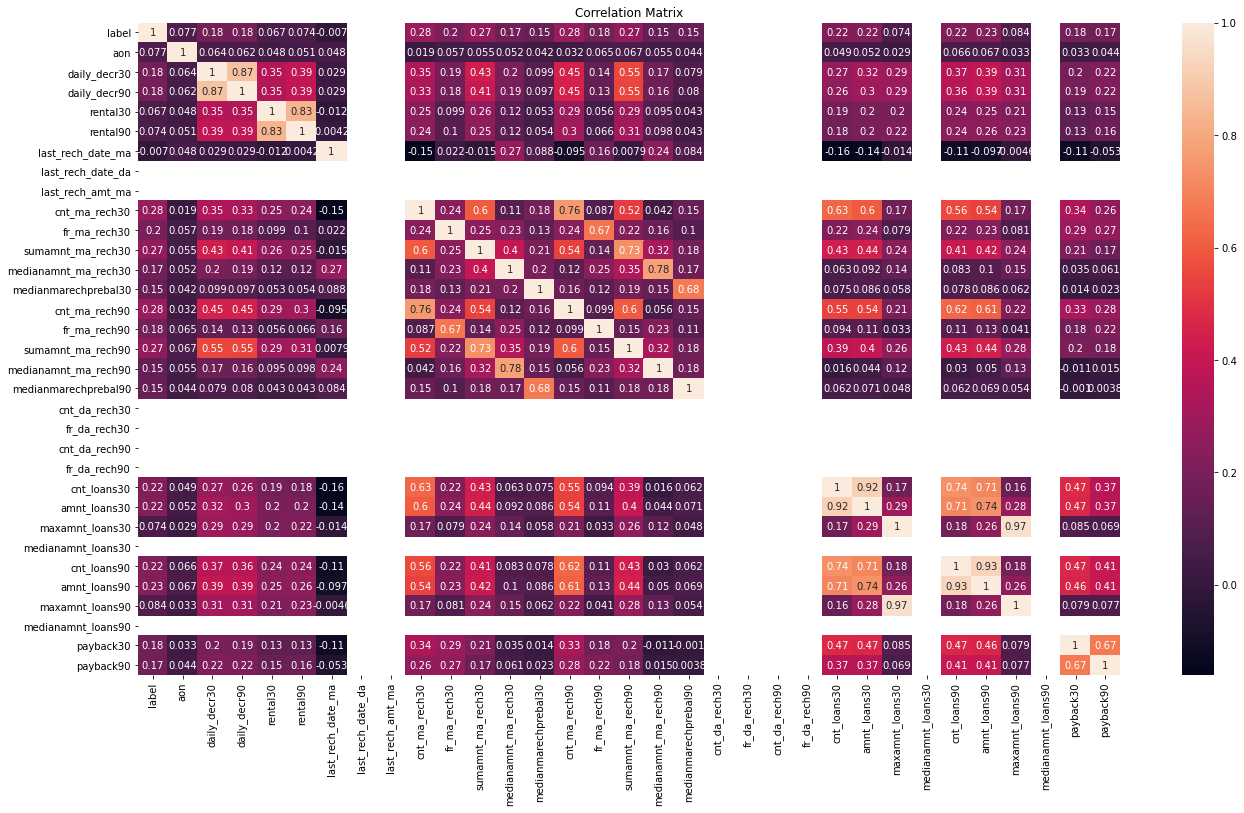

In [123]:
#Lets do some Multi-Variate analysis before proceeding for model building.
plt.figure(figsize=[22,12])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

### 

From the above we can cinclude that much of the variables have somewhat relations with each other. We will use Feature selection to select the best features.

# Separating independent variable and target variable

In [124]:
y =df['label']
x = df.drop(['label','cnt_da_rech90','rental90','daily_decr90','rental30','amnt_loans30','amnt_loans90','sumamnt_ma_rech90'], axis = 1)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Finding The Best Random State

In [126]:
y =df['label']
x = df.drop('label', axis = 1)

from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    features_train, features_test, target_train, target_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(features_train,target_train)
    predrf=LR.predict(features_test)
    acc=accuracy_score(target_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on Random_State',maxRS)

Best Accuracy is 0.8787016126467126 on Random_State 74


# Model Building

In [127]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(x,y.values.ravel())
print("Shape of x_resample :",x_resample.shape)
print("Shape of y_resample :",y_resample.shape)

Shape of x_resample : (366862, 32)
Shape of y_resample : (366862,)


In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.30, random_state = 74)
print("Shape of x_train2 :", x_train.shape)
print("Shape of y_train2 :", y_train.shape)
print("Shape of x_test2 :", x_test.shape)
print("Shape of y_test2 :", y_test.shape)

Shape of x_train2 : (256803, 32)
Shape of y_train2 : (256803,)
Shape of x_test2 : (110059, 32)
Shape of y_test2 : (110059,)


In [129]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Feature Selection Using F-score

In [130]:
from sklearn import feature_selection as fs
num_features = 32
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(x_train,y_train)
fs_indices_fscore =np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([13,  8, 15, 10, 22, 27, 23, 26,  2,  1,  9, 30, 14, 31, 12, 11, 17,
       16, 28, 24,  0,  4,  3,  5, 21, 20, 19,  7,  6, 18, 29, 25],
      dtype=int64)

In [131]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['medianmarechprebal30', 'last_rech_amt_ma', 'fr_ma_rech90',
       'fr_ma_rech30', 'fr_da_rech90', 'cnt_loans90', 'cnt_loans30',
       'medianamnt_loans30', 'daily_decr30', 'aon', 'cnt_ma_rech30',
       'medianamnt_loans90', 'cnt_ma_rech90', 'payback30',
       'medianamnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech90', 'sumamnt_ma_rech90', 'amnt_loans90',
       'amnt_loans30', 'label', 'rental30', 'daily_decr90', 'rental90',
       'cnt_da_rech90', 'fr_da_rech30', 'cnt_da_rech30',
       'last_rech_date_da', 'last_rech_date_ma', 'medianmarechprebal90',
       'maxamnt_loans90', 'maxamnt_loans30'], dtype=object)

In [132]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([7.68405940e+04, 7.46232442e+04, 6.45992381e+04, 6.17711351e+04,
       5.50050019e+04, 4.91533632e+04, 4.69679395e+04, 4.64767382e+04,
       3.17886365e+04, 3.11415180e+04, 2.90150740e+04, 2.65801448e+04,
       2.36977929e+04, 2.25875005e+04, 2.08061441e+04, 2.02121301e+04,
       1.97153847e+04, 1.40866658e+04, 6.94223673e+03, 4.86835964e+03,
       4.49578868e+03, 3.64816655e+03, 2.97399420e+03, 2.05057350e+00,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan])

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

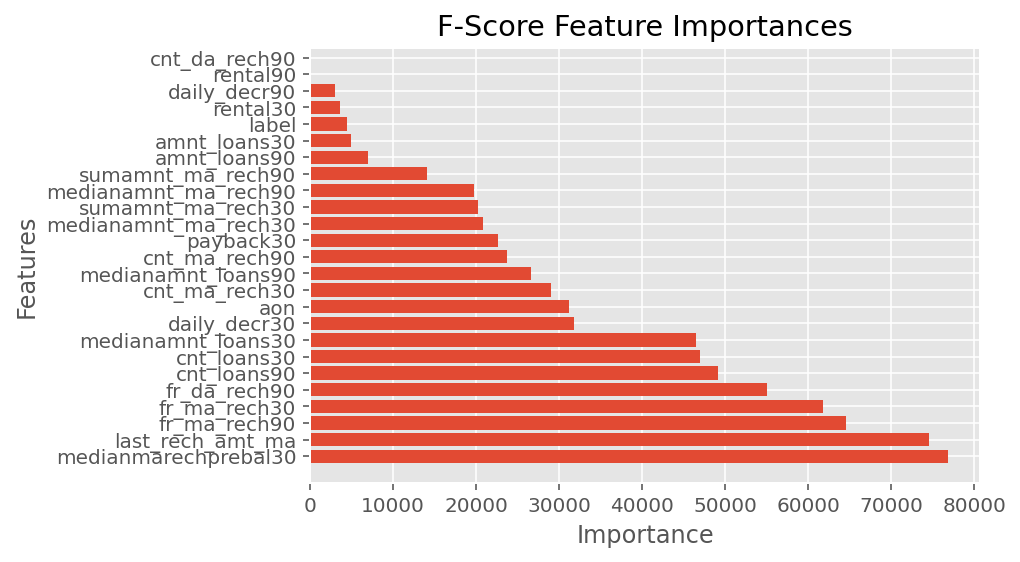

In [134]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

# First Model Using Logistic Regression

In [135]:
#Create the model and train
model = LogisticRegression()
model.fit(x_train,y_train)

#predict the results for test
test_pred = model.predict(x_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))

0.8043594799153182
[[46681  8128]
 [13404 41846]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81     54809
           1       0.84      0.76      0.80     55250

    accuracy                           0.80    110059
   macro avg       0.81      0.80      0.80    110059
weighted avg       0.81      0.80      0.80    110059

0.7953698775944651


Second model using Random forest Classifier

In [136]:
#Create the model and train
model = RandomForestClassifier()
model.fit(x_train,y_train)

#predict the results for test
test_pred = model.predict(x_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))

0.9382967317529689
[[51140  3669]
 [ 3122 52128]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     54809
           1       0.93      0.94      0.94     55250

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059

0.9388457139769647


Third Model Using Decision Tree Classifier

In [137]:
#Create the model and train
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#predict the results for test
test_pred = dtc.predict(x_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.8949563415985972
[[49577  5232]
 [ 6329 48921]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     54809
           1       0.90      0.89      0.89     55250

    accuracy                           0.89    110059
   macro avg       0.90      0.89      0.89    110059
weighted avg       0.90      0.89      0.89    110059

0.8943264809922945


Fourth Model Using KNeighborsClassifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier

#Create the model and train
model = KNeighborsClassifier()
model.fit(x_train,y_train)

#predict the results for test
test_pred = model.predict(x_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))

0.8652813490945765
[[50820  3989]
 [10838 44412]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     54809
           1       0.92      0.80      0.86     55250

    accuracy                           0.87    110059
   macro avg       0.87      0.87      0.86    110059
weighted avg       0.87      0.87      0.86    110059

0.856952658440343


# RandomSearch CV for Hyper Parameter Tuning

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

In [140]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}